# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Train DataSet
train_df=pd.read_excel('Data_Train.csv')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#Test Data
test_df=pd.read_excel('flight_test.csv.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

1 Data is Null.we will drop this data.

In [5]:
train_df.duplicated().sum()

220

There is 220 Datas Are Duplicate and we will Drop It.

In [6]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null data in train data set.

In [7]:
test_df.duplicated().sum()

26

There is total 26 Duplicates data in test data set.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Date Of Juonery Dep_Time and Arrival Time is object type we will convert into reliable dtype.

In [9]:
#Data Cleaning
train_df.dropna(inplace=True)
train_df.drop_duplicates(keep='first',inplace=True)
test_df.drop_duplicates(keep='first',inplace=True)

In [10]:
train_df["Journey_month"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.month
train_df["Journey_day"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.day

test_df["Journey_month"]=pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_df["Journey_day"]=pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [11]:
train_df['Duration']=train_df['Duration'].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)
test_df['Duration']=test_df['Duration'].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [12]:
train_df['Dep_hour']=pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df['Dep_min']=pd.to_datetime(train_df["Dep_Time"]).dt.minute

test_df['Dep_hour']=pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df['Dep_min']=pd.to_datetime(test_df["Dep_Time"]).dt.minute

In [13]:
train_df['Arrival_hour']=pd.to_datetime(train_df["Arrival_Time"]).dt.hour
train_df['Arrival_min']=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

test_df['Arrival_hour']=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df['Arrival_min']=pd.to_datetime(test_df["Arrival_Time"]).dt.minute

In [14]:
#as We convert datatype so drop unnecessary test data.
test_df.drop(['Arrival_Time','Dep_Time','Date_of_Journey'],axis=1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,3,6,4,0,19,15


In [15]:
#as We convert datatype so drop unnecessary test data.
train_df.drop(['Arrival_Time','Dep_Time','Date_of_Journey'],axis=1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,3,1,11,30,14,10


In [16]:
train_df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
train_df['Additional_Info']=train_df['Additional_Info'].replace("No Info",'No info')

In [18]:
train_df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [19]:
test_df['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

# Visualization

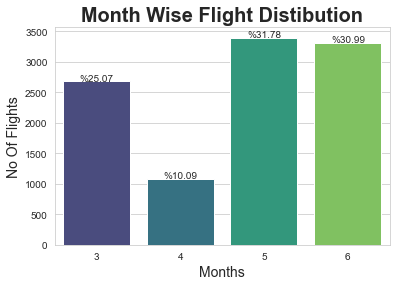

In [20]:
sns.set_style('whitegrid')
ax=sns.countplot(train_df['Journey_month'],data=train_df,palette='viridis')
plt.title("Month Wise Flight Distibution",fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Months',fontsize=14)
plt.ylabel('No Of Flights',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/10683*100), (p.get_x()+0.2, p.get_height()+8))

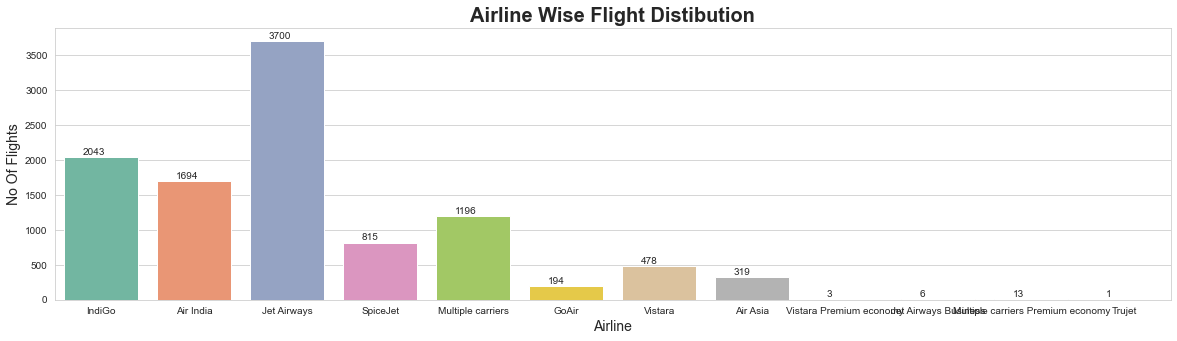

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
ax=sns.countplot(train_df['Airline'],data=train_df,palette='Set2')
plt.title("Airline Wise Flight Distibution",fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Airline',fontsize=14)
plt.ylabel('No Of Flights',fontsize=14)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.2, p.get_height()+8),va='bottom')

In [22]:
train_df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(336.9714285714286, 0.5, 'Price')

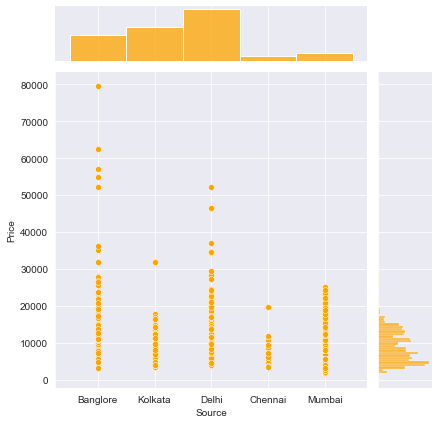

In [23]:
sns.set_style("darkgrid")
sns.jointplot(x=train_df['Source'],y=train_df['Price'],data=train_df,color='orange')
plt.xlabel('Source',fontsize=14)
plt.ylabel('Price',fontsize=14)

From this chart we see that price from the starting from Banglore is high and from Chennai is low.also the Flight starting 
form Delhi is high.

Text(336.9714285714286, 0.5, 'Price')

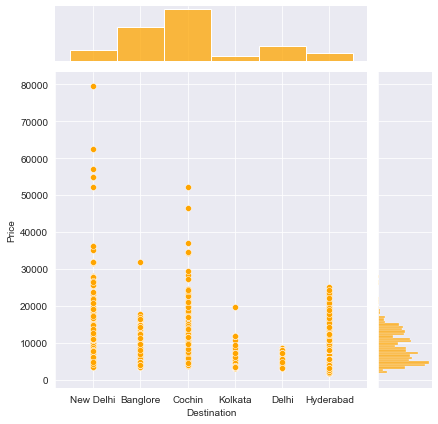

In [24]:
sns.set_style("darkgrid")
sns.jointplot(x=train_df['Destination'],y=train_df['Price'],data=train_df,color='orange')
plt.xlabel('Destination',fontsize=14)
plt.ylabel('Price',fontsize=14)

Very Few Flight Having Destination Of Delhi and Not A single Flight Having Destination of Mumbai.Price of Destination For New Delhi is
High. and for Kolkata and New Delhi is very law.

Text(0, 0.5, 'Airline')

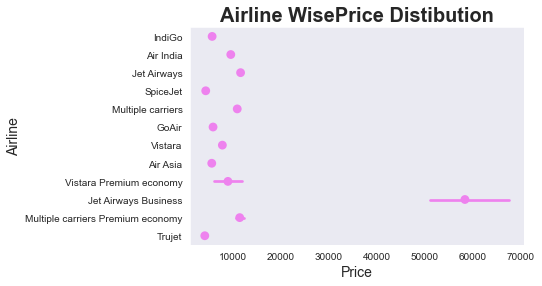

In [25]:
sns.set_style("dark")
sns.pointplot(y=train_df['Airline'],x=train_df['Price'],data=train_df,join=False,color='Violet')
plt.title("Airline WisePrice Distibution",fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Price',fontsize=14)
plt.ylabel('Airline',fontsize=14)

Price for the Multiple Carriers Premium Economy is very high.

In [26]:
train_df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

No of Flight of Truejet ,Vistara premium economy ,Jet Airways Business and Multiple carriers premium economy is low so we convert 
it into one categoery others.

In [27]:
train_df['Airline'].replace({'Multiple carriers Premium economy':'others','Jet Airways Business':'others','Vistara Premium economy':'others','Trujet':'others'},inplace=True)

In [28]:
test_df['Airline'].value_counts()

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [29]:
test_df['Airline'].replace({'Multiple carriers Premium economy':'others','Jet Airways Business':'others','Vistara Premium economy':'others'},inplace=True)

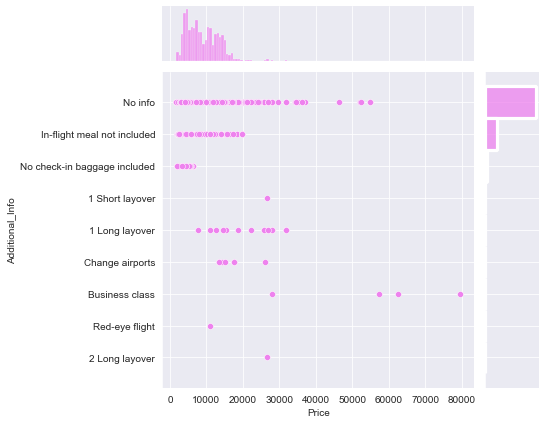

In [30]:
sns.set_style('darkgrid')
sns.jointplot(y=train_df['Additional_Info'],x=train_df['Price'],color='violet')

From chart we see that price for Business class is very high which is normal thing.

In [31]:
train_df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Change airports ,busines class and other category are very small so we convert into others.

In [32]:
train_df['Additional_Info']=train_df['Additional_Info'].replace({'1 Long layover':'others','Change airports':'others','Business class':'others','1 Short layover':'ohers','Red-eye flight':'others','2 Long layover':'2 Long layover'})

In [33]:
test_df['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

In [34]:
train_df['Additional_Info']=train_df['Additional_Info'].replace({'1 Long layover':'others','Change airports':'others','Business class':'others'})

In [35]:
train_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [36]:
test_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

# Label Encoder

In [37]:
l_train=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']

In [38]:
l_test=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lb=LabelEncoder()

In [41]:
#train dataset
for i in l_train:
    train_df[i]=lb.fit_transform(train_df[i])

In [42]:
#test dataset
for i in l_test:
    test_df[i]=lb.fit_transform(test_df[i])

# STATASTICAL

In [43]:
train_df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.575894,1.953642,1.439495,74.286465,629.781591,1.463105,2.607150,9026.790289,4.701491,13.463200,12.478494,24.404989,13.387689,24.719939
std,1.705080,1.186327,1.481015,36.707488,500.699045,1.821371,0.790766,4624.849541,1.163802,8.467493,5.727227,18.815719,6.855547,16.570450
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,170.000000,0.000000,3.000000,5224.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,505.000000,0.000000,3.000000,8266.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,910.000000,4.000000,3.000000,12344.750000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,8.000000,4.000000,5.000000,127.000000,2860.000000,4.000000,5.000000,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000


# Co Relation

Text(0.5, 1.0, 'Co-Relation')

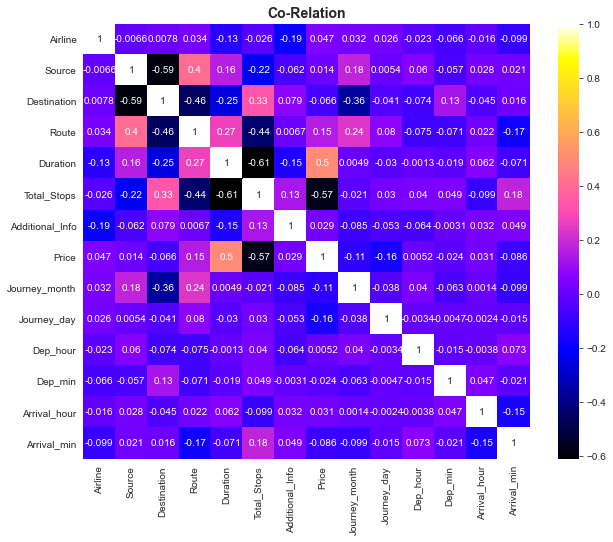

In [44]:
plt.figure(figsize=(10,8))
corr=train_df.corr()
sns.heatmap(data=corr,annot=True,cmap='gnuplot2')
plt.title("Co-Relation",fontdict={'fontweight':'bold','fontsize':14})

From this chart we see that Duration having highest relation with Price. and Jounery Month and Day having negative relation with 
price

Source,Destination,Route and Duration are four having relation with each other.

In [45]:
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,3,3897,3,24,22,20,1,10
1,1,3,0,84,445,1,3,7662,5,1,5,50,13,15
2,4,2,1,118,1140,1,3,13882,6,9,9,25,4,25
3,3,3,0,91,325,0,3,6218,5,12,18,5,23,30
4,3,0,5,29,285,0,3,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,3,4107,4,9,19,55,22,25
10679,1,3,0,64,155,4,3,4145,4,27,20,45,23,20
10680,4,0,2,18,180,4,3,7229,4,27,8,20,11,20
10681,7,0,5,18,160,4,3,12648,3,1,11,30,14,10


# Data Cleaning

In [46]:
from scipy.stats import zscore

In [47]:
#Train Dataset
z=np.abs(zscore(train_df))
train_df_new=train_df[(z<3).all(axis=1)]
train_df_new.shape

(10290, 14)

In [48]:
train_df=train_df_new

In [49]:
#Test DataSet
z_test=np.abs(zscore(test_df))
test_df_new=test_df[(z_test<3).all(axis=1)]
test_df=test_df_new
X_test=test_df

In [50]:
x=train_df.drop('Price',axis=1)

In [51]:
y=train_df['Price']

# Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std=StandardScaler()

In [54]:
X=std.fit_transform(x)

In [55]:
x=X

In [56]:
X1_test=std.fit_transform(X_test)

# Random State Selection

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

In [58]:
ln=LinearRegression()

In [59]:
for i in range(0,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    ln.fit(x_train,y_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random score",i,"Model Performance is very well")
        print("Random stata is:",i)
        print("Train Score",r2_score(y_train,pred_train)*100)
        print("Test Score",r2_score(y_test,pred_test)*100)

At Random score 929 Model Performance is very well
Random stata is: 929
Train Score 48.23410652664658
Test Score 48.22575609035682
At Random score 978 Model Performance is very well
Random stata is: 978
Train Score 48.24967885704228
Test Score 48.25126344930377
At Random score 1141 Model Performance is very well
Random stata is: 1141
Train Score 48.24873473391615
Test Score 48.248322314155615


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=978,test_size=0.20)

In [61]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [62]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [63]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)
    print("Test Score",f.score(x_test,y_test)*100)

In [64]:
fun(ln)

Taining Score:- 48.120526118029204
Mean Absolute Error 2322.3493828755522
Mean Squared Error 8581368.747548265
Root Mean Squared Erro 2929.3973352121875
R2 Score 48.80298941806414
Test Score 48.80298941806414


In [65]:
fun(svr)

Taining Score:- 5.68146107988563
Mean Absolute Error 3293.499751801597
Mean Squared Error 15821691.873218141
Root Mean Squared Erro 3977.649038467087
R2 Score 5.6067452539311
Test Score 5.6067452539311


In [66]:
fun(svrl)

Taining Score:- 42.9754811991129
Mean Absolute Error 2350.8296784876125
Mean Squared Error 9562002.52577059
Root Mean Squared Erro 3092.248781351622
R2 Score 42.952463773772735
Test Score 42.952463773772735


In [67]:
fun(svrp)

Taining Score:- 5.533176297110353
Mean Absolute Error 3299.191008766421
Mean Squared Error 15829097.266799014
Root Mean Squared Erro 3978.5798052570235
R2 Score 5.562564188569963
Test Score 5.562564188569963


In [68]:
fun(dtc)

Taining Score:- 99.48748630899922
Mean Absolute Error 650.8739067055394
Mean Squared Error 1974706.8791302235
Root Mean Squared Erro 1405.2426406604034
R2 Score 88.2187688279989
Test Score 88.2187688279989


In [69]:
fun(knn)

Taining Score:- 88.86097788566282
Mean Absolute Error 1084.9317784256557
Mean Squared Error 2982746.204159378
Root Mean Squared Erro 1727.0628836725598
R2 Score 82.20473988823683
Test Score 82.20473988823683


# Regurization

In [70]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [71]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

In [72]:
fun(ls)

Taining Score:- 48.12043551203467
Mean Absolute Error 2322.4194977430484
Mean Squared Error 8582265.700608928
Root Mean Squared Erro 2929.550426363903
R2 Score 48.79763813708682
Test Score 48.79763813708682


In [73]:
fun(rd)

Taining Score:- 48.1205255834656
Mean Absolute Error 2322.366471245054
Mean Squared Error 8581425.534473116
Root Mean Squared Erro 2929.4070277913097
R2 Score 48.80265062353405
Test Score 48.80265062353405


In [74]:
fun(es)

Taining Score:- 44.58348271606931
Mean Absolute Error 2480.577785052444
Mean Squared Error 9316085.31916973
Root Mean Squared Erro 3052.2262889847684
R2 Score 44.419622009132496
Test Score 44.419622009132496


# Ensemble Method

In [75]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [76]:
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gfr=GradientBoostingRegressor()

In [77]:
fun(rfr)

Taining Score:- 98.56021121185286
Mean Absolute Error 585.5473216773104
Mean Squared Error 1190774.5346048274
Root Mean Squared Erro 1091.2261610705764
R2 Score 92.89576077635857
Test Score 92.89576077635857


In [78]:
fun(adr)

Taining Score:- 63.17887799270962
Mean Absolute Error 2109.921906766703
Mean Squared Error 6366497.90558739
Root Mean Squared Erro 2523.192007277169
R2 Score 62.01705459454191
Test Score 62.01705459454191


In [79]:
fun(gfr)

Taining Score:- 84.39398264240974
Mean Absolute Error 1187.003144917691
Mean Squared Error 2695723.806958379
Root Mean Squared Erro 1641.8659527983334
R2 Score 83.91713439534276
Test Score 83.91713439534276


# Hyper Parameter For Best Score

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
p1={'n_estimators':[100,150,250,500],'max_depth':[3,5,7,9,11],'min_samples_split':[1,2,3],'min_samples_leaf':[1,2],'max_features':['auto','log2','sqrt']}

In [113]:
g1=GridSearchCV(rfr,p1)
g1.fit(x,y)
print(g1.best_params_)

{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [82]:
rfr1=RandomForestRegressor(max_depth=13,max_features='auto',min_samples_leaf=1,n_estimators=250)

In [83]:
fun(rfr1)

Taining Score:- 97.55909255637748
Mean Absolute Error 619.2261815860825
Mean Squared Error 1159839.0721940172
Root Mean Squared Erro 1076.9582499772298
R2 Score 93.0803237805828
Test Score 93.0803237805828


# Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

In [236]:
for i in range(2,11):
    score=cross_val_score(rfr1,x,y,cv=i)
    print("At value of cv=",i,' score is',score.mean())

At value of cv= 2  score is 0.9089320170023505
At value of cv= 3  score is 0.9189806227810889
At value of cv= 4  score is 0.9227208632417605
At value of cv= 5  score is 0.9238277153526575
At value of cv= 6  score is 0.9240797497919674
At value of cv= 7  score is 0.9262175345081696
At value of cv= 8  score is 0.927315083909076
At value of cv= 9  score is 0.9257894375699013
At value of cv= 10  score is 0.9282334221918186


In [104]:
for i in range(2,16):
    score=cross_val_score(dtc,x,y,cv=i)
    print("At value of cv=",i,' score is',score.mean())

At value of cv= 2  score is 0.8493509204247103
At value of cv= 3  score is 0.8602163596325054
At value of cv= 4  score is 0.8654479825306862
At value of cv= 5  score is 0.8784603587178156
At value of cv= 6  score is 0.8699390311232768
At value of cv= 7  score is 0.8753419380485843
At value of cv= 8  score is 0.8786412615323863
At value of cv= 9  score is 0.8747915739258371
At value of cv= 10  score is 0.8840245805131802
At value of cv= 11  score is 0.8823075729800238
At value of cv= 12  score is 0.8775052887385383
At value of cv= 13  score is 0.8804162557984629
At value of cv= 14  score is 0.8812114373538528
At value of cv= 15  score is 0.8804611409854911


# Model Saving

In [85]:
import pickle
filename='Flight_Price_Prediction.pkl'
pickle.dump(rfr1,open(filename,'wb'))

# Conclusion

       Actual       Predict
3570    11911  12557.687293
10142    6674   5658.218074
10606   14781  14716.114863
9681    15170  14274.562485
4513     5224   5014.404653
...       ...           ...
3211     4544   4562.719845
1417     9977  13775.007981
8958    12524  11055.293952
6886    14973  16269.935584
5250     8236  11114.545794

[2058 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regressor')

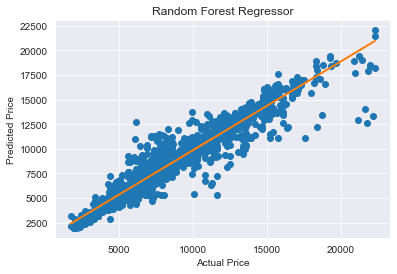

In [87]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfr1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rfr1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor')

# Applying Our Test DataSet

In [88]:
res=pd.DataFrame()
res['Predict']=rfr1.predict(X_test)

print(res)

           Predict
0     17332.580000
1     17332.580000
2     16988.260000
3     16431.876000
4     13565.528639
...            ...
2619  17351.544000
2620  17353.288000
2621  17332.580000
2622  16786.882667
2623  17332.580000

[2624 rows x 1 columns]
